In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from PyTorchAberrations.aberration_functions import crop_center2, complex_exp
from PyTorchAberrations.aberration_layers import PhasePlane

from torch.nn import Module, ConvTranspose2d


In [3]:
# from math import ceil
# PI = 3.14159265358979323846264338327950288419716939937510582

# class PhasePlane(Module):
#     """
#     Layers that simulate the transmission through a thin diffuser.
#     """
    
#     def __init__(self, 
#                  shape, 
#                  corr_length, 
#                  dx, init_to_zero = True,
#                  overlap_coeff = 2.):
#         super(PhasePlane, self).__init__()
        
#         self.shape = shape
#         sigma_k = .5*corr_length/dx
#         # create the kernel (Gaussian)
#         n_k = int(5*sigma_k)
#         # overlap_coeff determines how much neighbouring cells overlaps
#         dilation = int(sigma_k*overlap_coeff)
#         kernel_size = [ceil(s/(dilation)-1) for s in shape]
        
#         x_k = torch.arange(n_k)
#         X,Y = torch.meshgrid(x_k,x_k)
#         X0 = Y0 = n_k/2-.5
#         Rsq = (X-X0)**2+(Y-Y0)**2
#         self.K = torch.exp(-Rsq/(2*sigma_k**2))[None,None,...]
        
#         self.convt = ConvTranspose2d(
#                         in_channels=1,
#                         out_channels=1,
#                         dilation=dilation,
#                         kernel_size = kernel_size
#                      )
        
#         if init_to_zero:
#             # initialize weight (phase) to zero
#             self.convt.weight.data.fill_(0.)    
#         else:
#             # random phase from uniform distribution between 0 and 2pi
#             nn.init.uniform_(self.convt.weight, 0., 2*PI)

        
#     def forward(self,input):
#         # get the mask of phase value
#         phase_plane = self.convt(self.K)
#         print(phase_plane.shape)
#         phase_plane = crop_center2(phase_plane, self.shape[0], self.shape[1])
#         # multiply input field by the complex phase plane contributions
#         input = input*complex_exp(phase_plane)
#         return input

## Effect of a phase plane

The number of internal degrees of freedom corresponds to the number of independent areas of 
size `corr_length` in the total area.

To see the effect, we initialize the phase values to random values (`init_to_zero = False`). 
In real optimization, it is probably better to set them to zero.

torch.Size([1, 1, 102, 102])


<IPython.core.display.Javascript object>


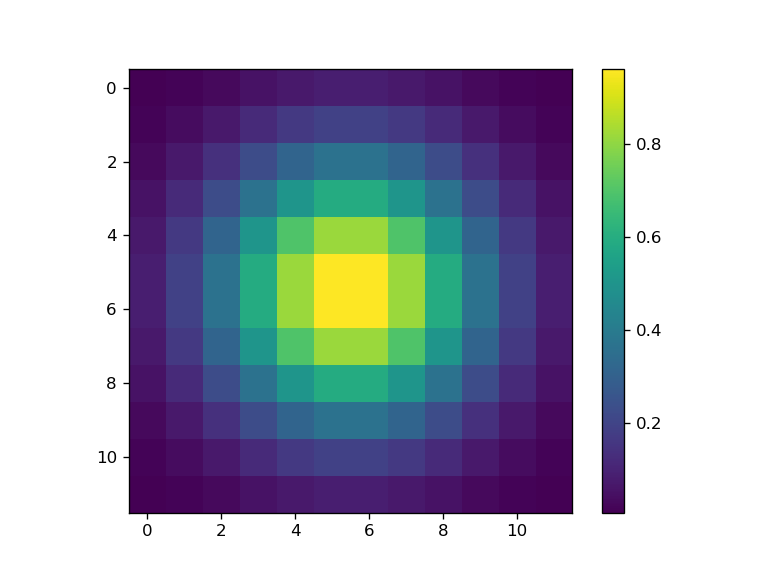

In [4]:
shape = (100,100)
pp = PhasePlane(shape = shape, corr_length = 5, dx = 1, init_to_zero = False)

input = torch.ones(*shape, dtype = torch.complex64)
C = pp(input)

plt.figure()
plt.imshow(pp.K.detach().numpy()[0,0,...])
plt.colorbar()


## Output field for a plane wave

<IPython.core.display.Javascript object>


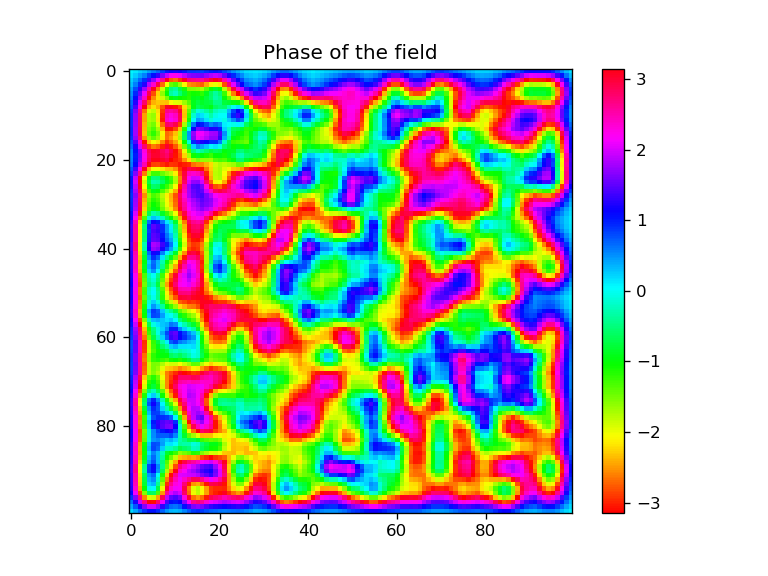

In [9]:

np_arr = np.angle(C[0,0,...].detach().numpy())
plt.figure()
plt.imshow(np_arr, interpolation = 'None', cmap = 'hsv')
plt.title('Phase of the field')
plt.colorbar()